<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación diagnóstica de mamografías </h2>
</center>

<h3> Práctico I -  Análisis y Visualización de Datos<h3> 

<h4>Integrantes:Mario Agustín Sgró, Lucía Benítez y Germán Bertea<h4>

Inicialmente, como en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns

#%matplotlib inline
plt.rcParams['figure.figsize'] = (200, 200)
#plt.style.use('ggplot')


In [0]:
pd.options.display.max_columns = 200
#pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 1000

Comenzamos la lectura del dataset:

In [0]:
dataframe = pd.read_csv('Datos_Mamografias.csv',sep=',')
dataframe.head(3)

,Imagen,Age,View,Laterality,Dcm_1,Dcm_2,Dcm_3,Dcm_4,Dcm_5,Dcm_6,Dcm_7,Dcm_8,Dcm_9,Dcm_10,Dcm_11,Dcm_12,Dcm_13,Dcm_14,Dcm_15,Dcm_16,Dcm_17,Dcm_18,Dcm_19,Dcm_20,Dcm_21,Dcm_22,Dcm_23,Area,Promedio,Media,Desvio,Asimetria,Kurtosis,Moda,Desvio_L1,Desvio_L2,Desvio_L3,Asimetria_L1,Asimetria_L2,Asimetria_L3,promGradiente,Relacion,Relacion_L1,Relacion_L2,Relacion_L3,Relacion_L4,EP,EPBinaria,RelEntropia,Haralick_1,Haralick_2,Haralick_3,Haralick_4,Haralick_5,Haralick_6,Haralick_7,Haralick_8,Haralick_9,Haralick_10,Haralick_11,Haralick_12,Haralick_13,Haralick_14,Haralick_15,Haralick_16,Haralick_17,Haralick_18,Haralick_19,Haralick_20,Haralick_21,Haralick_22,Haralick_23,Haralick_24,Haralick_25,Haralick_26,Haralick_27,Haralick_28,Haralick_29,Haralick_30,Haralick_31,Haralick_32,Haralick_33,Haralick_34,Haralick_35,Haralick_36,Haralick_37,Haralick_38,Haralick_39,Haralick_40,Haralick_41,Haralick_42,Haralick_43,Haralick_44,Haralick_45,Haralick_46,Haralick_47,Haralick_48,Haralick_49,Haralick_50,Haralick_51,Haralick_52,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14,DF15,DF16,DF17,DF18,DF19,DF20,DF21,DF22,DF23,DF24,DF25,DF26,DF27,DF28,DF29,DF30,DF31,DF32,DF33,DF34,DF35,DF36,DF37,DF38,DF39,DF40,DF41,DF42,DF43,DF44,DF45,DF46,DF47,DF48,DFb1,DFb2,DFb3,DFb4,DFb5,DFb6,DFb7,DFb8,DFb9,DFb10,DFb11,DFb12,DFb13,DFb14,DFb15,DFb16,DFb17,DFb18,DFb19,DFb20,DFb21,DFb22,DFb23,DFb24,DFb25,DFb26,DFb27,DFb28,DFb29,DFb30,DFb31,DFb32,DFb33,DFb34,DFb35,DFb36,DFb37,DFb38,DFb39,DFb40,DFb41,DFb42,DFb43,DFb44,DFb45,DFb46,DFb47,DFb48,ACR
0,Imagen_0.npy,47.0,CC,R,29.0,130.0,155.0,1115.0,RHODIUM,0.05,0.3,TUNGSTEN,54.0,58.5,700.0,621.0,1.073,-8.4,AUTOMATIC,AutoFilter,321.0,6.53,0.0172,0.531,2047.0,4096.0,NO,1906717.0,1204.431581,1108.0,651.401605,0.631631,-0.158630,771.0,582.461892,617.414299,571.626601,1.254898,0.340503,0.478727,26.263890,50.872416,30.246896,39.025868,57.284054,56.462588,0.769471,0.176043,0.012500,0.000003,29632.094980,0.965015,423492.945587,0.010546,2407.880580,1.664340e+06,12.237075,18.933134,8.625112e-07,8.446691,-0.209392,0.994013,0.000002,35926.620735,0.957571,423372.418259,0.009612,2407.639224,1.657563e+06,12.235604,19.052746,7.760232e-07,8.586088,-0.198048,0.992383,0.000003,30038.183717,0.964600,424267.419997,0.010677,2408.826967,1.667031e+06,12.238215,18.941108,8.581286e-07,8.455624,-0.208819,0.993943,0.000002,35106.380011,0.958552,423500.102813,0.009655,2407.789176,1.658894e+06,12.236029,19.042339,7.841840e-07,8.570271,-0.199065,0.992547,1.304171,0.026670,226.278823,41.339488,-0.004142,-0.801469,1.739567,0.322655,571.489193,158.341050,-1.165407,-0.038599,1.770398,0.299554,1114.887169,161.670179,-1.183844,0.085194,1.720933,0.239346,1706.529132,189.689059,-1.103810,0.225300,1.563104,0.110528,2449.700145,306.298340,1.157895,1.152985,1.748927,0.349874,1941.302019,416.666606,0.676891,0.995952,1.852387,0.649428,1560.111365,524.693103,0.226560,0.823606,1.911039,0.972917,1231.635371,639.340074,-0.129694,0.658866,1.347935,0.041248,303.067490,57.467044,2.316524,0.466817,1.704150,0.247506,768.162586,262.713541,-0.122940,-0.589775,1.798841,0.421929,1148.854002,337.062943,-0.678163,0.150996,1.751035,0.341997,1627.667484,380.140389,-0.268313,0.277035,1.569299,0.124358,2030.372695,254.066279,8.731229,-1.076601,1.679952,0.224516,1405.837251,235.788707,5.110653,-0.352031,1.663799,0.207258,867.106498,193.95269,14.221943,0.852135,1.362630,0.046754,334.152548,266.144497,42.727260,5.647393,c
1,Imagen_1.npy,47.0,MLO,R,28.0,100.0,115.0,1102.0,RHODIUM,0.05,0.3,TUNGSTEN,47.0,86.0,700.0,628.0,1.073,-44.9,AUTOMATIC,AutoFilter,301.0,4.33,0.0126,0.519,2047.0,4096.0,NO,1993379.0,1095.674679,966.0,617.925388,0.822188,0.159056,771.0,577.999696,630.151155,590.633212,1.092861,0.499981,0.421337,26.204560,50.051997,35.612135,48.703866,58.672811,50.210659,0.771289,0.165031,0.053571,0.000003,40089.941086,0.947479,381659.322432,0.008924,2191.233824,1.486547e+06,12.113787,18.843584,7.420714e-07,8.663215,-0.180066,0.987916,0.000003,48232.540197,0.936822,381719.250143,0.008153,2191.

In [0]:
print(dataframe.shape)
print(dataframe.info())

(5000, 198)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 198 entries, Imagen to ACR
dtypes: float64(187), object(11)
memory usage: 7.6+ MB
None


Nombre de las variables/features/características:


In [0]:
dataframe.columns.values

array(['Imagen', 'Age', 'View', 'Laterality', 'Dcm_1', 'Dcm_2', 'Dcm_3',
       'Dcm_4', 'Dcm_5', 'Dcm_6', 'Dcm_7', 'Dcm_8', 'Dcm_9', 'Dcm_10',
       'Dcm_11', 'Dcm_12', 'Dcm_13', 'Dcm_14', 'Dcm_15', 'Dcm_16',
       'Dcm_17', 'Dcm_18', 'Dcm_19', 'Dcm_20', 'Dcm_21', 'Dcm_22',
       'Dcm_23', 'Area', 'Promedio', 'Media', 'Desvio', 'Asimetria',
       'Kurtosis', 'Moda', 'Desvio_L1', 'Desvio_L2', 'Desvio_L3',
       'Asimetria_L1', 'Asimetria_L2', 'Asimetria_L3', 'promGradiente',
       'Relacion', 'Relacion_L1', 'Relacion_L2', 'Relacion_L3',
       'Relacion_L4', 'EP', 'EPBinaria', 'RelEntropia', 'Haralick_1',
       'Haralick_2', 'Haralick_3', 'Haralick_4', 'Haralick_5',
       'Haralick_6', 'Haralick_7', 'Haralick_8', 'Haralick_9',
       'Haralick_10', 'Haralick_11', 'Haralick_12', 'Haralick_13',
       'Haralick_14', 'Haralick_15', 'Haralick_16', 'Haralick_17',
       'Haralick_18', 'Haralick_19', 'Haralick_20', 'Haralick_21',
       'Haralick_22', 'Haralick_23', 'Haralick_24', 'H

Tipo de las variables/features/características:

In [15]:
dataframe.dtypes

Imagen            object
Age              float64
View              object
Laterality        object
Dcm_1            float64
Dcm_2            float64
Dcm_3            float64
Dcm_4            float64
Dcm_5             object
Dcm_6            float64
Dcm_7            float64
Dcm_8             object
Dcm_9            float64
Dcm_10           float64
Dcm_11           float64
Dcm_12           float64
Dcm_13           float64
Dcm_14           float64
Dcm_15            object
Dcm_16            object
Dcm_17           float64
Dcm_18           float64
Dcm_19           float64
Dcm_20           float64
Dcm_21           float64
Dcm_22           float64
Dcm_23            object
Area             float64
Promedio         float64
Media            float64
Desvio           float64
Asimetria        float64
Kurtosis         float64
Moda             float64
Desvio_L1        float64
Desvio_L2        float64
Desvio_L3        float64
Asimetria_L1     float64
Asimetria_L2     float64
Asimetria_L3     float64


Debido a que en las columnas 'Dcm_18' y 'Dcm_19' se observaron datos faltantes denotados como 'None',  se ha cambiado por 'np.nan' para que se puedan leer como números los datos de tales columnas:

In [0]:
dataframe['Dcm_18'].replace('None',np.nan,inplace=True)
dataframe['Dcm_19'].replace('None',np.nan,inplace=True)

dataframe.Dcm_18 = dataframe.Dcm_18.astype(float)
dataframe.Dcm_19 = dataframe.Dcm_19.astype(float)

In [0]:
data = dataframe.dropna(axis=0)

Exploramos los valores de algunas mediads estadísticas tales como la media, su desviación estándar y sus valores máximos y mínimos:

In [0]:
data.describe().loc[['mean','std','min','max']]

,Age,Dcm_1,Dcm_2,Dcm_3,Dcm_4,Dcm_6,Dcm_7,Dcm_9,Dcm_10,Dcm_11,Dcm_12,Dcm_13,Dcm_14,Dcm_17,Dcm_20,Dcm_21,Dcm_22,Area,Promedio,Media,Desvio,Asimetria,Kurtosis,Moda,Desvio_L1,Desvio_L2,Desvio_L3,Asimetria_L1,Asimetria_L2,Asimetria_L3,promGradiente,Relacion,Relacion_L1,Relacion_L2,Relacion_L3,Relacion_L4,EP,EPBinaria,RelEntropia,Haralick_1,Haralick_2,Haralick_3,Haralick_4,Haralick_5,Haralick_6,Haralick_7,Haralick_8,Haralick_9,Haralick_10,Haralick_11,Haralick_12,Haralick_13,Haralick_14,Haralick_15,Haralick_16,Haralick_17,Haralick_18,Haralick_19,Haralick_20,Haralick_21,Haralick_22,Haralick_23,Haralick_24,Haralick_25,Haralick_26,Haralick_27,Haralick_28,Haralick_29,Haralick_30,Haralick_31,Haralick_32,Haralick_33,Haralick_34,Haralick_35,Haralick_36,Haralick_37,Haralick_38,Haralick_39,Haralick_40,Haralick_41,Haralick_42,Haralick_43,Haralick_44,Haralick_45,Haralick_46,Haralick_47,Haralick_48,Haralick_49,Haralick_50,Haralick_51,Haralick_52,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14,DF15,DF16,DF17,DF18,DF19,DF20,DF21,DF22,DF23,DF24,DF25,DF26,DF27,DF28,DF29,DF30,DF31,DF32,DF33,DF34,DF35,DF36,DF37,DF38,DF39,DF40,DF41,DF42,DF43,DF44,DF45,DF46,DF47,DF48,DFb1,DFb2,DFb3,DFb4,DFb5,DFb6,DFb7,DFb8,DFb9,DFb10,DFb11,DFb12,DFb13,DFb14,DFb15,DFb16,DFb17,DFb18,DFb19,DFb20,DFb21,DFb22,DFb23,DFb24,DFb25,DFb26,DFb27,DFb28,DFb29,DFb30,DFb31,DFb32,DFb33,DFb34,DFb35,DFb36,DFb37,DFb38,DFb39,DFb40,DFb41,DFb42,DFb43,DFb44,DFb45,DFb46,DFb47,DFb48
mean,54.719487,29.717418,116.526686,127.814646,1012.990070,0.045408,3.000000e-01,59.238312,80.184618,690.277203,621.282168,1.055226,0.042987,387.77017,0.503998,2046.376500,4094.545304,2.720588e+06,1164.427390,1030.553372,591.721552,1.037847,1.235850,737.902358,516.611893,556.138592,536.167512,1.381434,0.881041,0.654568,21.773464,31.103993,28.306619,24.172535,31.041817,35.346953,0.768815,0.102083,0.345023,0.000004,25252.585097,0.957907,3.621698e+05,0.011789,2328.503681,1.423426e+06,11.942792,18.396287,1.009668e-06,8.273595,-0.198592,0.986773,0.000004,30158.328976,0.949980,3.621279e+05,0.010694,2328.441848,1.418353e+06,11.940528,18.510311,9.128500e-07,8.405075,-0.187413,0.983693,0.000005,24879.322893,0.958617,3.623715e+05,0.012067,2328.754587,1.424607e+06,11.943672,18.383894,1.023196e-06,8.261270,-0.199870,0.987153,0.000004,30205.242062,0.949890,3.621191e+05,0.010687,2328.439350,1.418271e+06,11.940504,18.511120,9.123930e-07,8.406136,-0.187331,0.983653,1.163033,1.449030e-02,268.332827,45.201485,0.882657,-1.056646,1.778563,0.385746,651.188692,139.739313,-0.779841,-0.226779,1.776133,0.311267,1129.332921,151.145949,-1.111937,0.194809,1.687837,0.198887,1711.357699,191.920923,-0.986908,0.321713,1.510055,0.087920,2507.960066,330.263837,1.737573,1.199537,1.718058,0.286993,1948.622519,428.545657,1.797569,1.182366,1.844985,0.598724,1524.303572,511.479939,1.613945,1.140087,1.912074,0.985270,1178.394631,586.031107,1.254168,1.057365,1.231274,0.022827,354.118354,74.032906,9.895633,0.202529,1.723123,0.282437,845.790213,216.929987,2.204457,-0.789253,1.799917,0.446620,1122.952382,312.913931,-0.122130,0.258891,1.716766,0.288595,1604.663867,371.853885,0.592006,0.302973,1.503103,0.090094,2056.886653,278.948630,14.244834,-1.576073,1.652578,0.206646,1404.530882,241.883678,10.070732,-0.425431,1.698790,0.261731,900.902046,198.798985,22.863188,1.053930,1.271146,0.029658,437.937088,423.844888,31.179057,4.059439
std,10.637254,1.728523,26.180322,55.308019,247.963643,0.015843,2.653708e-14,14.014531,26.626324,17.159254,16.414562,0.031334,32.639848,134.45537,0.077207,30.649966,71.509807,1.254638e+06,126.597323,163.805514,111.132977,0.391821,1.682784,261.537588,141.248332,139.298397,145.723391,0.547858,0.457197,0.450821,4.238366,12.877319,12.576185,13.609615,15.564255,19.391262,0.003530,0.035036,0.185730,0.000005,9337.704615,0.026785,1.326671e+05,0.003858,253.129868,5.335530e+05,0.259538,0.356623,7.285501e-07,0.322833,0.043995,0.012724,0.000004,10661.844631,0.030776,1.326732e+05,0.003333,253.115169,5.337599e+05,0.260963,0.347721,6.211210

(creo que deberíamos explorar un poco mas para ver si encontramos algo similar a lo que hallaron las chicas hay q ver si encontramos algo así)

Las características indicadas con el prefijo *Dcm*  se corresponden con los datos DICOM (Digital Imaging and Communication in Medicine) que es el formato estándar para el intercambio de
imágenes médicas y se tienen 22  columnas enumeradas. Si bien nos han detallado los nombres de las columnas, no conocemos su correspondencia directa con los detallados en https://dicom.innolitics.com/ciods/digital-mammography-x-ray-image. 

   
   
Los datos correspondientes al *Histograma global* serán 'Promedio', 'Mediana', 'Desviación estándar', 'Asimetría', 'Kurtosis' y 'Moda' de las cuales en el trabajo realizado se propone que 
*(debeberíamos corroborarlo por ACR ?)*

*  La desviación estándar va aumentando a medida que aumenta la densidad (datos con mayor dispersión alrededor de la media).
*   La asimetríıa va disminuyendo a medida que aumenta la densidad (aumenta la simetría de la curva) 
*   La curtosis va disminuyendo a medida que aumenta la densidad (va disminuyendo el grado de apuntamiento de la distribución).


Los datos correspondientes al *Histograma local* serán 'desviación estándar'  y  'asimetría' de las 3 partes centrales (la del 40 %, el 70% y el 90 %, denotadas como  (L1, L2 y L3), que son las columnas
'Desvío_L1', 'Desvío_L2','Desvío_L3' y 'Asimetría_L1','Asimetría_L2' y 'Asimetría_L3'

De estos ejemplos se puede observar cómo los valores de desviación van aumentado con la densidad, y por el contrario los de asimetría disminuyen. 

Cuando se aplica el operador gradiente a una imagen,  este devuelve otra que puede ser analizada
de la misma manera. Si a la imagen resultante se umbraliza (utilizando un umbral fijo), se notará que las mamografíaas correspondientes a la clase A tienen pocos píxeles blancos en comparación al total. Por lo tanto esa relación entre cantidad de píxeles blancos y totales se la extrae como una característica más

(HAY QUE SEGUIR DESCRIBIENDO, lo hago esta noche, mañana charlamos de hacer las gráficas que creo que faltan)



# Analizando variables no-float

In [0]:
Features = [x for x in data.columns if data[x].dtype != 'float64']
print(Features)

['Imagen', 'View', 'Laterality', 'Dcm_5', 'Dcm_8', 'Dcm_15', 'Dcm_16', 'Dcm_23', 'ACR']


In [0]:
for feature in Features[1:]:
    print(feature,np.unique(data[feature]),data[feature].dtype)

View ['CC' 'MLO' 'MLOID'] object
Laterality ['L' 'R'] object
Dcm_5 ['MOLYBDENUM' 'RHODIUM' 'SILVER'] object
Dcm_8 ['MOLYBDENUM' 'TUNGSTEN'] object
Dcm_15 ['AUTOMATIC' 'AUTO_FILTER' 'MANUAL'] object
Dcm_16 ['AutoFilter' 'LORAD AUTO AEC' 'MANUAL' 'Manual'] object
Dcm_23 ['NO' 'YES'] object
ACR ['a' 'b' 'c' 'd'] object


Habría que analizar si deberíamos primero discriminar por alguna de estas variables, creemos que "View" sería una de ellas.

In [0]:
#definimos algunos filtros
CC = data["View"] == "CC"
MLO = data["View"] == "MLO"
MLOID = data["View"] == "MLOID"

print(CC.sum(),MLO.sum(),MLOID.sum())

3049 3304 41


# Analizando variables float

In [0]:
All_features = [x for x in data.columns if data[x].dtypes == 'float64']
Dicom_features = [x for x in data.columns if ('Dcm_' in x and data[x].dtypes == 'float64')]
Haralick_features = [x for x in data.columns if ('Haralick_' in x and data[x].dtypes == 'float64')]
DFb_features = [x for x in data.columns if ('DFb' in x and data[x].dtypes == 'float64')]
DF_features = [x for x in data.columns if ( not(x in DFb_features) and 'DF' in x and data[x].dtypes == 'float64')]
Others_features = [x for x in data.columns if ((data[x].dtypes == 'float64') and (not(x in Dicom_features) and not(x in DFb_features) and not(x in Haralick_features) and  not(x in DF_features)))]

In [0]:
print(len(All_features))

189


In [0]:
ntot = len(Dicom_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Dicom_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        ax.hist(data[view][feature],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

In [0]:
ntot = len(Dicom_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Dicom_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        sns.boxplot(y=feature,data=data,x="View",ax=ax)        
        
    ax.set_title(feature)
    
for ax in axes.flat[ntot:]:
    ax.axis("off")
#sns.boxplot(y="Dcm_18",data=data,x="View")#  , hue=None, data=None)
sns.despine()

In [0]:
ntot = len(Haralick_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Haralick_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        ax.hist(data[view][feature],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

In [0]:
ntot = len(Haralick_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Haralick_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        sns.boxplot(y=feature,data=data,x="View",ax=ax)        
       
    ax.set_title(feature)
    
for ax in axes.flat[ntot:]:
    ax.axis("off")
#sns.boxplot(y="Dcm_18",data=data,x="View")#  , hue=None, data=None)
sns.despine()

In [0]:
ntot = len(Haralick_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Haralick_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        #sns.boxplot(y=feature,data=data,x="View",ax=ax)        
        sns.boxplot(data=data,y=feature, x='View', hue='ACR',ax=ax)
    ax.set_title(feature)
    
for ax in axes.flat[ntot:]:
    ax.axis("off")
#sns.boxplot(y="Dcm_18",data=data,x="View")#  , hue=None, data=None)
sns.despine()

In [0]:
ntot = len(DF_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],DF_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        ax.hist(data[view][feature],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

In [0]:
ntot = len(DF_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],DF_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        sns.boxplot(y=feature,data=data,x="View",ax=ax)        
        
    ax.set_title(feature)
    
for ax in axes.flat[ntot:]:
    ax.axis("off")
#sns.boxplot(y="Dcm_18",data=data,x="View")#  , hue=None, data=None)
sns.despine()

In [0]:
ntot = len(DFb_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],DFb_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        ax.hist(data[view][feature],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

In [0]:
ntot = len(DFb_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],DFb_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        sns.boxplot(y=feature,data=data,x="View", hue='ACR',ax=ax)        
        
    ax.set_title(feature)
    
for ax in axes.flat[ntot:]:
    ax.axis("off")
#sns.boxplot(y="Dcm_18",data=data,x="View")#  , hue=None, data=None)
sns.despine()

In [0]:
ntot = len(Others_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Others_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        ax.hist(data[view][feature],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

In [0]:
ntot = len(Others_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Others_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        sns.boxplot(y=feature,data=data,x="View",ax=ax)        
        
    ax.set_title(feature)
    
for ax in axes.flat[ntot:]:
    ax.axis("off")
#sns.boxplot(y="Dcm_18",data=data,x="View")#  , hue=None, data=None)
sns.despine()

In [0]:
Dicom_features.remove('Dcm_2')
Dicom_features.remove('Dcm_6')
Dicom_features.remove('Dcm_7')
Dicom_features.remove('Dcm_11')
Dicom_features.remove('Dcm_13')
Dicom_features.remove('Dcm_21')
Dicom_features.remove('Dcm_22')
#Dicom_features.append('ACR')

In [0]:
sns.pairplot(data[Dicom_features],hue="ACR",markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
Haralick_features.remove('Haralick_1')
Haralick_features.remove('Haralick_14')
Haralick_features.remove('Haralick_27')
Haralick_features.remove('Haralick_40')
Haralick_features.remove('Haralick_49')
#Haralick_features.append('ACR')

In [0]:
H1 = Haralick_features[:8]
H1.append('ACR')
sns.pairplot(data[H1],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
H2 = Haralick_features[8:16]
H2.append('ACR')
sns.pairplot(data[H2],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
H3 = Haralick_features[16:24]
H3.append('ACR')
sns.pairplot(data[H3],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
H4 = Haralick_features[24:32]
H4.append('ACR')
sns.pairplot(data[H4],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
H5 = Haralick_features[32:40]
H5.append('ACR')
sns.pairplot(data[H5],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
H6 = Haralick_features[40:]
H6.append('ACR')
sns.pairplot(data[H6],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
corr = data[Haralick_features].corr()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)

In [0]:
i = 0
DF = DF_features[i*8:(i+1)*8]
DF.append('ACR')
sns.pairplot(data[DF],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 1
DF = DF_features[i*8:(i+1)*8]
DF.append('ACR')
sns.pairplot(data[DF],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 2
DF = DF_features[i*8:(i+1)*8]
DF.append('ACR')
sns.pairplot(data[DF],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 3
DF = DF_features[i*8:(i+1)*8]
DF.append('ACR')
sns.pairplot(data[DF],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 4
DF = DF_features[i*8:(i+1)*8]
DF.append('ACR')
sns.pairplot(data[DF],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 5
DF = DF_features[i*8:(i+1)*8]
DF.append('ACR')
sns.pairplot(data[DF],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
corr = data[DF_features].corr()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)

In [0]:
i = 0
DFb = DFb_features[i*8:(i+1)*8]
DFb.append('ACR')
sns.pairplot(data[DFb],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 1
DFb = DFb_features[i*8:(i+1)*8]
DFb.append('ACR')
sns.pairplot(data[DFb],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 2
DFb = DFb_features[i*8:(i+1)*8]
DFb.append('ACR')
sns.pairplot(data[DFb],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 3
DFb = DFb_features[i*8:(i+1)*8]
DFb.append('ACR')
sns.pairplot(data[DFb],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 4
DFb = DFb_features[i*8:(i+1)*8]
DFb.append('ACR')
sns.pairplot(data[DFb],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 5
DFb = DFb_features[i*8:(i+1)*8]
DFb.append('ACR')
sns.pairplot(data[DFb],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
corr = data[DFb_features].corr()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)

In [0]:
i = 0
O = Others_features[i*8:(i+1)*8]
O.append('ACR')
sns.pairplot(data[O],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 1
O = Others_features[i*8:(i+1)*8]
O.append('ACR')
sns.pairplot(data[O],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 2
O = Others_features[i*8:(i+1)*8]
O.append('ACR')
sns.pairplot(data[O],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
corr = data[Others_features].corr()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)

['Dcm_1', 'Dcm_3', 'Dcm_4', 'Dcm_9', 'Dcm_10', 'Dcm_12', 'Dcm_14', 'Dcm_17', 'Dcm_18', 'Dcm_19', 'Dcm_20', 'Haralick_2', 'Haralick_3', 'Haralick_4', 'Haralick_5', 'Haralick_6', 'Haralick_7', 'Haralick_8', 'Haralick_9', 'Haralick_10', 'Haralick_11', 'Haralick_12', 'Haralick_13', 'Haralick_15', 'Haralick_16', 'Haralick_17', 'Haralick_18', 'Haralick_19', 'Haralick_20', 'Haralick_21', 'Haralick_22', 'Haralick_23', 'Haralick_24', 'Haralick_25', 'Haralick_26', 'Haralick_28', 'Haralick_29', 'Haralick_30', 'Haralick_31', 'Haralick_32', 'Haralick_33', 'Haralick_34', 'Haralick_35', 'Haralick_36', 'Haralick_37', 'Haralick_38', 'Haralick_39', 'Haralick_41', 'Haralick_42', 'Haralick_43', 'Haralick_44', 'Haralick_45', 'Haralick_46', 'Haralick_47', 'Haralick_48', 'Haralick_50', 'Haralick_51', 'Haralick_52', 'DF1', 'DF2', 'DF3', 'DF4', 'DF5', 'DF6', 'DF7', 'DF8', 'DF9', 'DF10', 'DF11', 'DF12', 'DF13', 'DF14', 'DF15', 'DF16', 'DF17', 'DF18', 'DF19', 'DF20', 'DF21', 'DF22', 'DF23', 'DF24', 'DF25', 'DF26

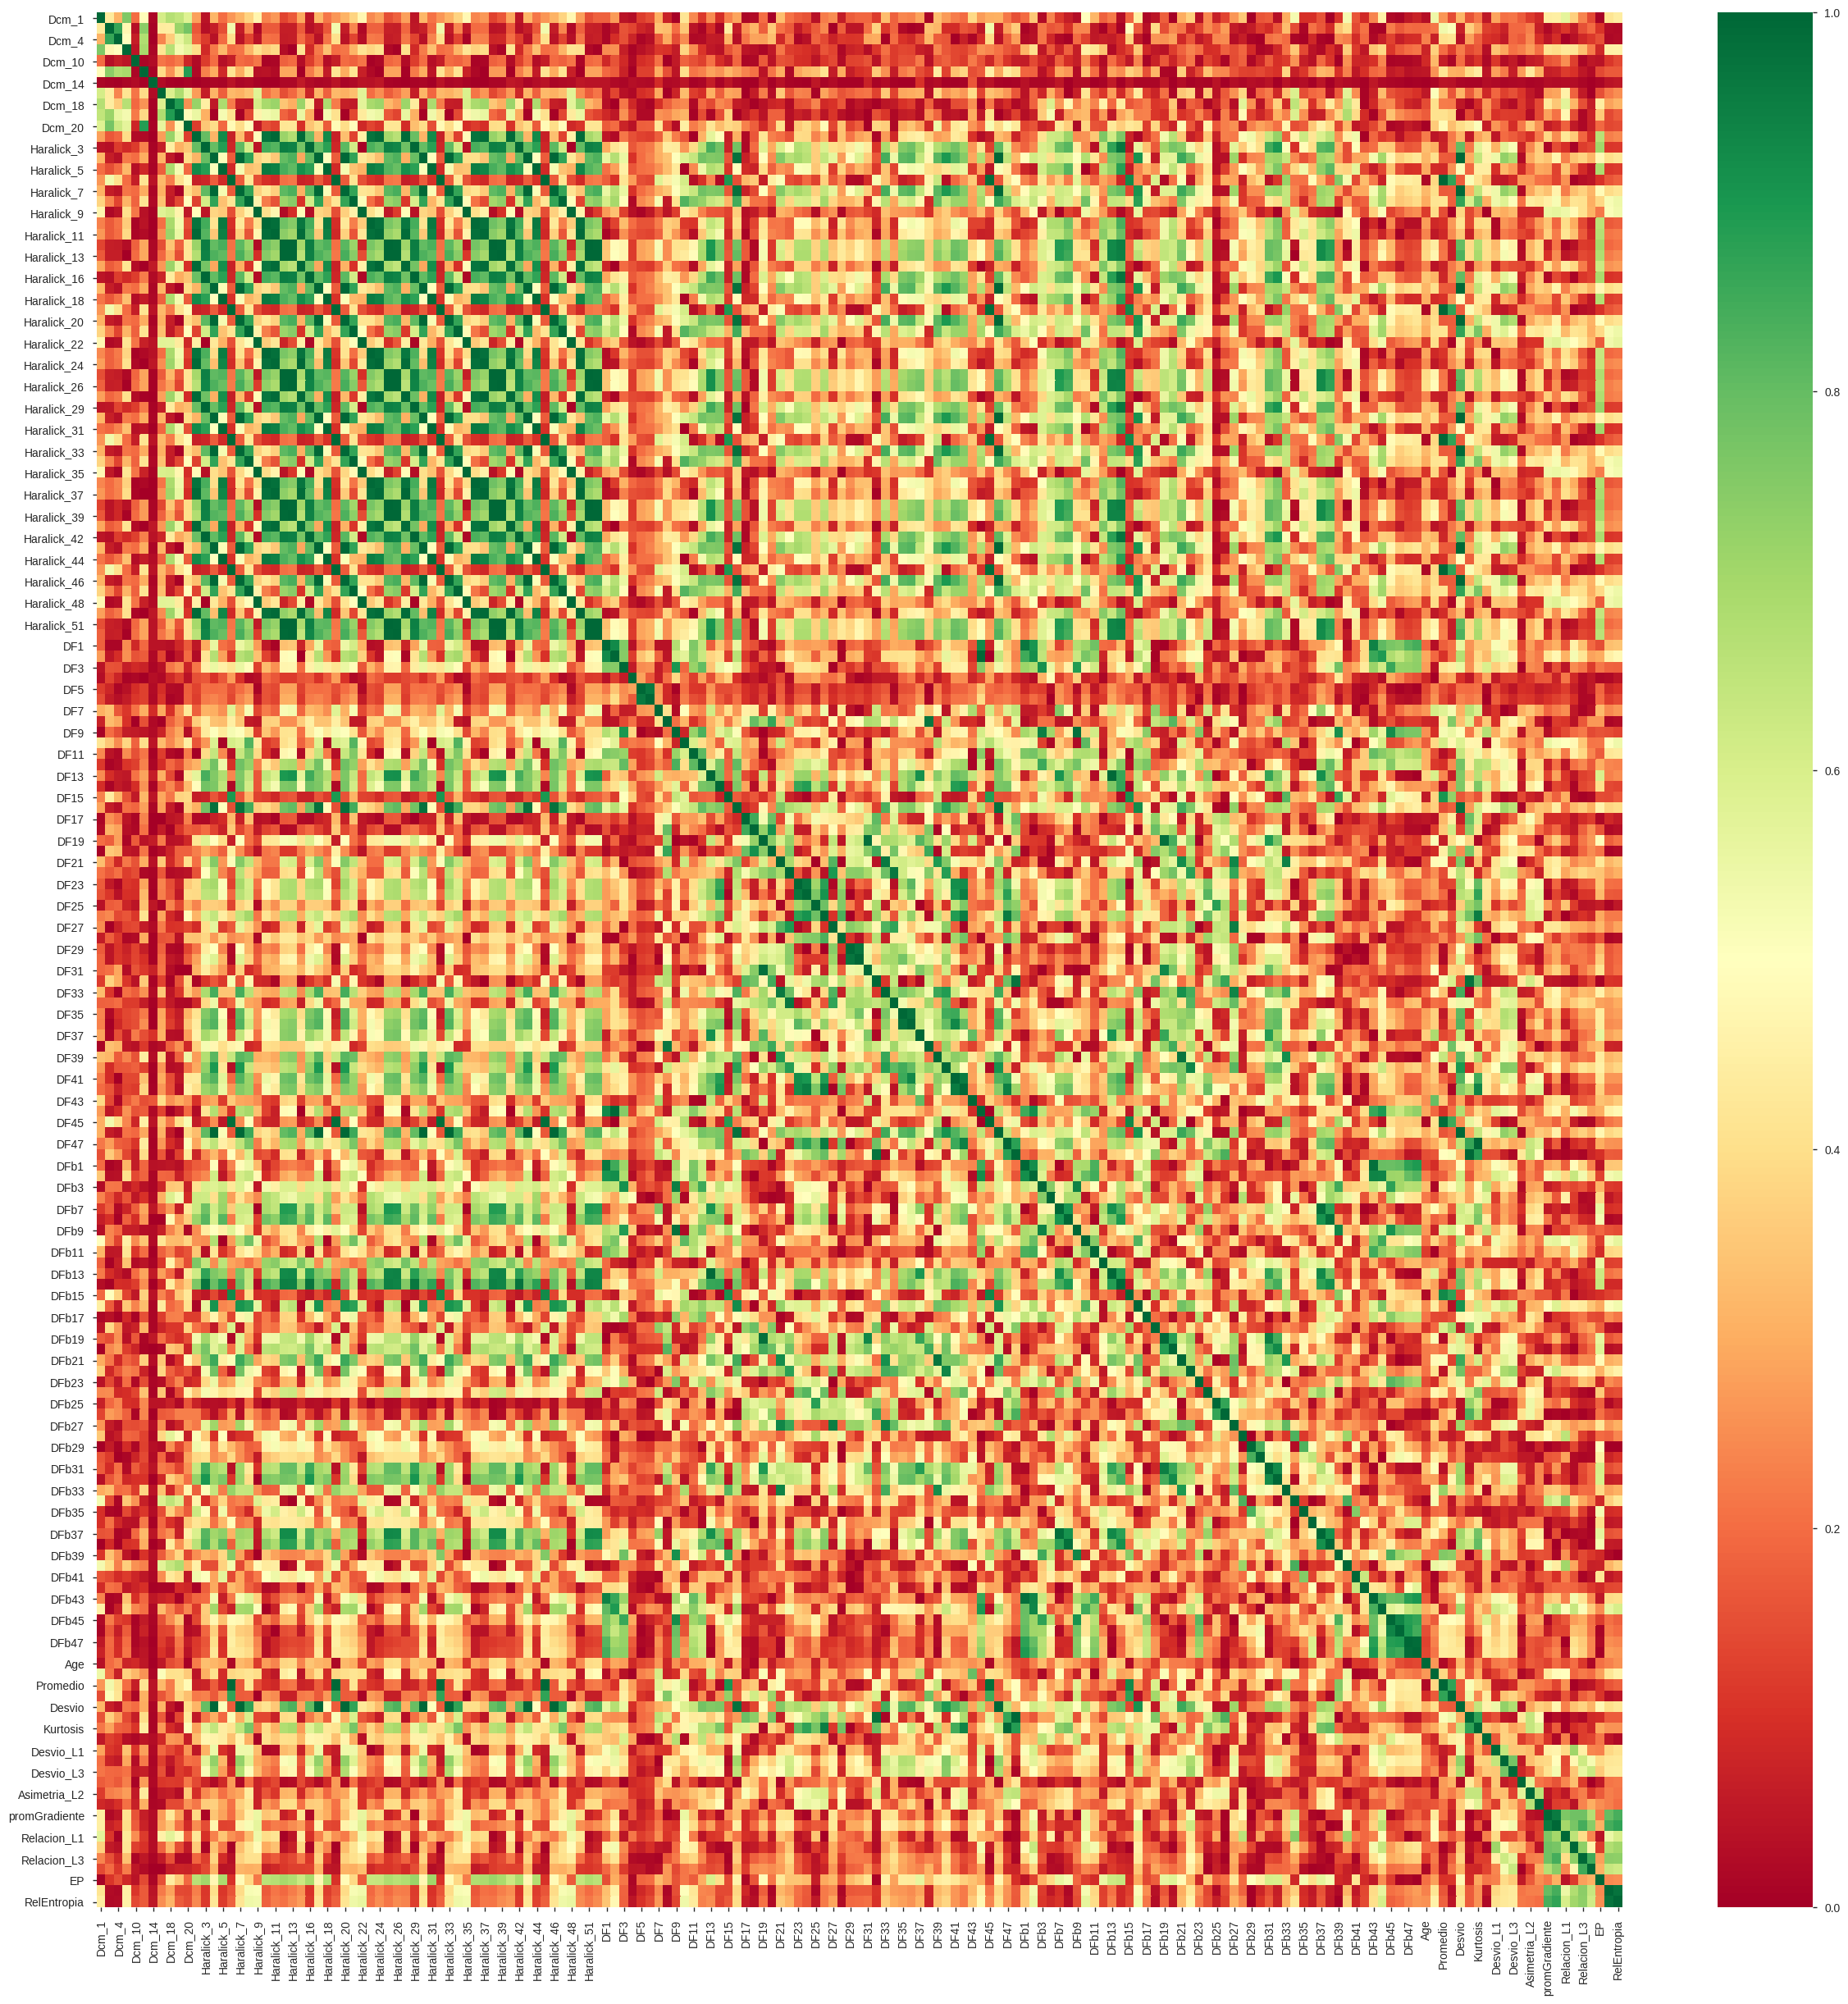

In [0]:
All_features = Dicom_features + Haralick_features + DF_features + DFb_features + Others_features
print(All_features,len(All_features))
corr = data[All_features].corr(method='spearman').abs()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)

In [0]:
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

In [0]:
for column in upper.columns:
    print(column)
    for i in range(1,upper[column].shape[0]):
        if(upper[column][i] > 0.95):
            print('    ',upper[column].index[i],upper[column][i])
           

Dcm_1
Dcm_3
Dcm_4
Dcm_9
Dcm_10
Dcm_12
Dcm_14
Dcm_17
Dcm_18
Dcm_19
Dcm_20
Haralick_2
Haralick_3
Haralick_4
Haralick_5
Haralick_6
Haralick_7
     Haralick_4 0.9998440855335414
Haralick_8
Haralick_9
Haralick_10
     Haralick_2 0.9756056745051138
     Haralick_5 0.9623554797958072
Haralick_11
     Haralick_2 0.9975751832384895
     Haralick_10 0.9851134940896852
Haralick_12
     Haralick_3 0.9532022421794836
Haralick_13
     Haralick_12 0.9968553848212862
Haralick_15
     Haralick_2 0.993403309797831
     Haralick_10 0.9684077855866949
     Haralick_11 0.9901554654085589
Haralick_16
     Haralick_3 0.9978322670044605
     Haralick_12 0.9533393964581445
Haralick_17
     Haralick_4 0.999999042414271
     Haralick_7 0.9998449557613777
Haralick_18
     Haralick_5 0.9968387622623025
     Haralick_10 0.9621641913504901
Haralick_19
     Haralick_6 0.9999991406976385
Haralick_20
     Haralick_4 0.9997943467129248
     Haralick_7 0.999993126499215
     Haralick_17 0.9997964132802473
Haralick_21
   

     Haralick_45 0.9999933209543036
     DF45 0.9880886156303523
Media
Desvio
     Haralick_4 0.99999333660803
     Haralick_7 0.9998280891236153
     Haralick_17 0.9999917988704101
     Haralick_20 0.999776541769683
     Haralick_30 0.9999983979948815
     Haralick_33 0.9998438494422949
     Haralick_43 0.9999916848415055
     Haralick_46 0.9997760503528456
     DF16 0.9798100928234375
     DF46 0.9979282605668791
Asimetria
     DF32 0.9768687677240651
     DF48 0.9969542857994358
Kurtosis
     DF26 0.9547835787326702
     DF47 0.9990201777164813
Moda
Desvio_L1
Desvio_L2
Desvio_L3
Asimetria_L1
Asimetria_L2
Asimetria_L3
promGradiente
Relacion
     promGradiente 0.9604693354751818
Relacion_L1
Relacion_L2
Relacion_L3
Relacion_L4
EP
EPBinaria
RelEntropia
     EPBinaria 0.9743216020522208


In [0]:
threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [0]:
print(len(to_drop))
print(to_drop)

74
['Haralick_7', 'Haralick_10', 'Haralick_11', 'Haralick_12', 'Haralick_13', 'Haralick_15', 'Haralick_16', 'Haralick_17', 'Haralick_18', 'Haralick_19', 'Haralick_20', 'Haralick_21', 'Haralick_22', 'Haralick_23', 'Haralick_24', 'Haralick_25', 'Haralick_26', 'Haralick_28', 'Haralick_29', 'Haralick_30', 'Haralick_31', 'Haralick_32', 'Haralick_33', 'Haralick_34', 'Haralick_35', 'Haralick_36', 'Haralick_37', 'Haralick_38', 'Haralick_39', 'Haralick_41', 'Haralick_42', 'Haralick_43', 'Haralick_44', 'Haralick_45', 'Haralick_46', 'Haralick_47', 'Haralick_48', 'Haralick_50', 'Haralick_51', 'Haralick_52', 'DF6', 'DF16', 'DF24', 'DF30', 'DF31', 'DF33', 'DF34', 'DF36', 'DF38', 'DF42', 'DF44', 'DF45', 'DF46', 'DF47', 'DF48', 'DFb1', 'DFb3', 'DFb9', 'DFb13', 'DFb14', 'DFb19', 'DFb21', 'DFb27', 'DFb31', 'DFb37', 'DFb38', 'DFb43', 'DFb48', 'Promedio', 'Desvio', 'Asimetria', 'Kurtosis', 'Relacion', 'RelEntropia']


In [0]:
_data = data[All_features]
_data = _data.drop(to_drop,axis=1)

In [0]:
print(data.shape)
print(_data.shape)

(6394, 198)
(6394, 101)


In [0]:
import pandas_profiling as pp

In [0]:
pr = pp.ProfileReport(data[All_features],bins=50,correlation_threshold=0.95)

In [0]:
pr.to_file(outputfile="output.html")

In [0]:
a = pr.get_rejected_variables(threshold=0.95)
print(len(a))

58


# Análisis

**1-¿Cuáles variables considera a priori las más importantes de analizar en el contexto dado?.**

La base de datos contiene 9 variables categóricas y 189 variables numéricas. Luego de un primer análisis exploratorio de las variables numéricas, mediante histogramas y diagramas de caja, descartamos 14 de estas variables las cuales eran mono-valuadas y por lo tanto no aportarían a la clasificación.

**2-Describir el tipo de las variables presentes en la base, analizar su distribución e identificarlas si es posible.**

* ACR (clasificación BI-RADS del Colegio Americano de Radiología)* 


*   DICOM (Digital Imaging and Communication in Medicine) es el estándar para el intercambio de imágenes médicas. 

*Un elemento de DICOM que es particularmente importante desde el punto de vista de los infor-
mes radiológicos es la función de visualización estándar en escala de grises (GSDF).*  **Cuál será?**

*  entropía de permutaciones es importante




Descripción: ask L

**3-Evaluar si existe correlación entre las variables.**

Se evaluó la correlación entre todas las variables mediante el método de pearson y el método de spearman. ¿Será más apropiado solo considerar las correlaciones entre variables de la misma clase (i.e. separando en variables Dicom, Haralick, etc)?

**4-Luego de un análisis exploratorio estime si existen variables que se muestren más relevantes para el problema final de clasificación.**

Del análisis de la correlación anterior se tomaron los pares de variables altamente correlacionadas (>0.95) y se descartó una de ellas para de esta forma disminuir la dimensión del problema.
Si consideramos la correlación de Pearson, nos quedan finalmente 113 variables. Para la correlación de Spearman nos quedan 101 variables.
Además, se empleó la biblioteca *pandas_profiling* para comparar con nuestros resultados. Esta biblioteca haciendo un análisis similar se queda con 118 variables. Deberíamos realizar un estudio más profundo de cómo funciona esta biblioteca para determinar de donde proviene la diferencia. 

